# Task 4.10 Part 1b

## Contents List:

- Import libraries and high_activity_cust.pkl

- Profiling based on age
    - Find aggregate variables
    - Compare with region
    - Compare with departments

- Profiling based on income
    - Find aggregate variables
    - Compare with region
    - Compare with departments

- Profiling based on number of dependants
    - Find aggregate variables
    - Compare with region
    - Compare with departments

- Export df_merged_final.pkl

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Steps 5-8: Customer Profiling using 'df_high_activity_cust' dataframe

## Import high_activity_cust.pkl as dataframe

In [2]:
path = r'C:\Users\susan\OneDrive\Desktop\Data Analytics Program\June 2023 Instacart Basket Analysis'

In [3]:
df_high_activity_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust.pkl'))

In [4]:
# Check shape

df_high_activity_cust.shape

(30964564, 33)

In [5]:
# Check output

df_high_activity_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


## Profiling based on age

In [6]:
df_high_activity_cust.loc[df_high_activity_cust['Age'] >= 60,'age_flag'] = 'Senior'
df_high_activity_cust.loc[(df_high_activity_cust['Age'] >= 45) & (df_high_activity_cust['Age'] < 60), 'age_flag'] = 'Middle Age'
df_high_activity_cust.loc[(df_high_activity_cust['Age'] >= 26) & (df_high_activity_cust['Age'] < 45), 'age_flag'] = 'Adult'
df_high_activity_cust.loc[df_high_activity_cust['Age'] < 26,'age_flag'] = 'Young adult'

In [7]:
# Check value counts

df_high_activity_cust['age_flag'].value_counts(dropna = False)

Senior         10574504
Adult           9214451
Middle Age      7311091
Young adult     3864518
Name: age_flag, dtype: int64

In [8]:
# Check output

df_high_activity_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult


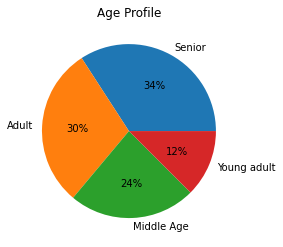

In [9]:
# Create a pie chart for 'age_flag'

pie_chart_age = df_high_activity_cust['age_flag'].value_counts().plot.pie(title = 'Age Profile', label = '', autopct = ('%1.f%%'))

In [10]:
# Export pie_chart_age

pie_chart_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_age_cust'))

### Find aggregate variables

In [11]:
age_agg = df_high_activity_cust.groupby('age_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [12]:
age_agg

days_since_prior_order                  prices                  \
                               min   max       mean    min   max      mean   
age_flag                                                                     
Adult                          0.0  30.0  10.815262    1.0  25.0  7.789144   
Middle Age                     0.0  30.0  10.823913    1.0  25.0  7.788404   
Senior                         0.0  30.0  10.800665    1.0  25.0  7.795446   
Young adult                    0.0  30.0  10.799071    1.0  25.0  7.784889   

                           
                      sum  
age_flag                   
Adult        7.176210e+07  
Middle Age   5.693223e+07  
Senior       8.242014e+07  
Young adult  3.007977e+07

### Compare age profile with region

In [34]:
# Create crosstab between age and region

crosstab_age_region = pd.crosstab(df_high_activity_cust['region'], df_high_activity_cust['age_flag'], dropna = False)

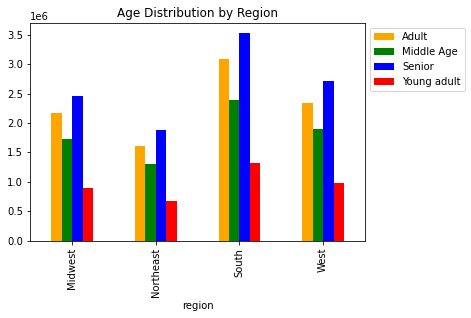

In [36]:
# Create a bar chart

bar_age_region = crosstab_age_region.plot.bar(title = 'Age Distribution by Region', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'green', 'Senior': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [37]:
# Export bar_age_region

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_region'))

### Compare age profile with departments

In [22]:
# Import departments_wrangled.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [23]:
# Check output

df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [26]:
# Rename 'Unnamed: 0' column as 'department_id'

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [28]:
# Check output

df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
# Merge df_dep with df_high_activity_cust

df_merged = df_high_activity_cust.merge(df_dep, on = 'department_id')

In [31]:
# Check output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages


In [32]:
# Create crosstab between age and departments

crosstab_age_departments = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

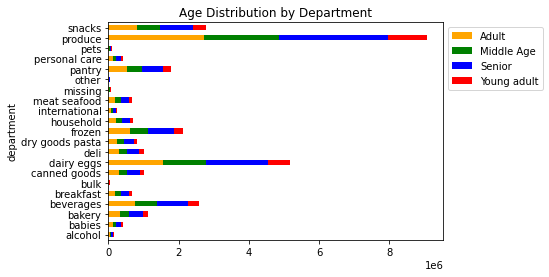

In [38]:
# Create a stacked bar chart

stacked_bar_age_department = crosstab_age_departments.plot.barh(stacked = True, title = 'Age Distribution by Department', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'green', 'Senior': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

Produce, Dairy/Eggs, Snacks, and Beverages are the most popular departments across all ages

In [39]:
# Export stacked bar chart

stacked_bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age_department'))

## Profiling based on income

In [40]:
# Create income_flag

df_merged.loc[df_merged['income'] <= 50000, 'income_flag'] = 'Low income'
df_merged.loc[(df_merged['income'] >50000) & (df_merged['income'] <= 150000), 'income_flag'] = 'Middle income'
df_merged.loc[df_merged['income'] > 150000, 'income_flag'] = 'High income'

In [41]:
# Check value counts

df_merged['income_flag'].value_counts(dropna = False)

Middle income    23707476
High income       3894534
Low income        3362554
Name: income_flag, dtype: int64

In [42]:
# Check output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income


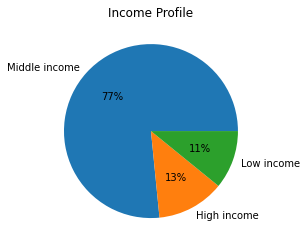

In [43]:
# Create a pie chart for 'income_flag'

pie_chart_income = df_merged['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = ('%1.f%%'))

In [44]:
# Export pie chart

pie_chart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_income_profile'))

### Find aggregate variables

In [45]:
income_agg = df_merged.groupby('income_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [46]:
income_agg

days_since_prior_order                  prices                  \
                                 min   max       mean    min   max      mean   
income_flag                                                                    
High income                      0.0  30.0  10.684293    1.0  25.0  7.940855   
Low income                       0.0  30.0  11.175808    1.0  25.0  6.707347   
Middle income                    0.0  30.0  10.779429    1.0  25.0  7.919577   

                             
                        sum  
income_flag                  
High income    3.089660e+07  
Low income     2.255382e+07  
Middle income  1.877438e+08

Low income customers have the lowest mean price for orders and a longer duration before placing their next order. Middle income customers generate the majority of sales.

### Compare income profile with region

In [47]:
# Create crosstab between income and region

crosstab_income_region = pd.crosstab(df_merged['region'], df_merged['income_flag'], dropna = False)

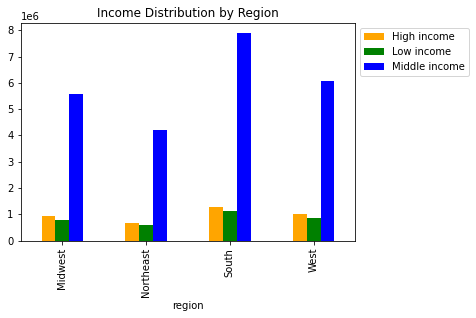

In [48]:
# Create a bar chart

bar_income_region = crosstab_income_region.plot.bar(title = 'Income Distribution by Region', color = {'Low income': 'green', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [49]:
# Export bar graph

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region'))

### Compare income profile with departments

In [50]:
# Create crosstab between income and departments

crosstab_income_departments = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

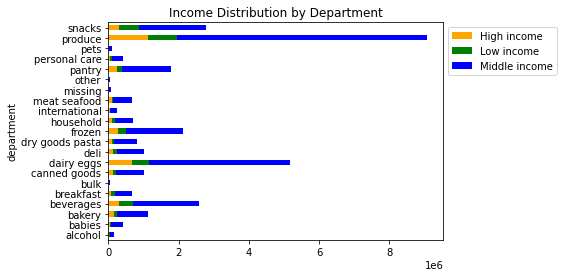

In [51]:
# Create a stacked bar chart

stacked_bar_income_department = crosstab_income_departments.plot.barh(stacked = True, title = 'Income Distribution by Department', color = {'Low income': 'green', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

High income customers buy more dairy and produce than low income customers, while low income customers buy more snacks than high income customers.

In [53]:
# Export stacked bar chart

stacked_bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_income_department'))

## Profiling based on number of dependants

In [55]:
# Create role_flag

df_merged.loc[df_merged['n_dependants'] == 0, 'role_flag'] = 'Individual'
df_merged.loc[df_merged['n_dependants'] != 0, 'role_flag'] = 'Caregiver'

In [56]:
# Check value counts

df_merged['role_flag'].value_counts(dropna = False)

Caregiver     23224883
Individual     7739681
Name: role_flag, dtype: int64

In [57]:
# Check output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department,income_flag,role_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver


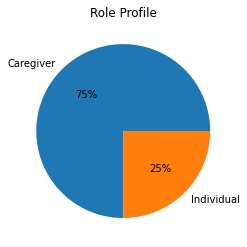

In [58]:
# Create a pie chart for 'role_flag'

pie_chart_role = df_merged['role_flag'].value_counts().plot.pie(title = 'Role Profile', label = '', autopct = ('%1.f%%'))

In [59]:
# Export pie chart

pie_chart_role.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_role_profile'))

### Find aggregate variables

In [60]:
role_agg = df_merged.groupby('role_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [61]:
role_agg

days_since_prior_order                  prices                  \
                              min   max       mean    min   max      mean   
role_flag                                                                   
Caregiver                     0.0  30.0  10.816416    1.0  25.0  7.790937   
Individual                    0.0  30.0  10.791951    1.0  25.0  7.789550   

                          
                     sum  
role_flag                 
Caregiver   1.809147e+08  
Individual  6.027949e+07

Caregiver customers generate the majority of sales.

### Compare role profile with region

In [62]:
# Create crosstab between role and region

crosstab_role_region = pd.crosstab(df_merged['region'], df_merged['role_flag'], dropna = False)

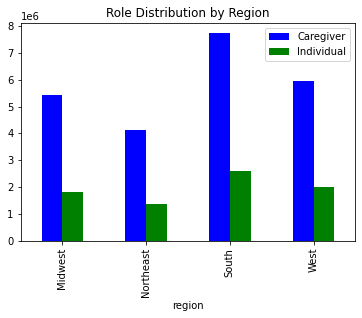

In [64]:
# Create a bar chart

bar_role_region = crosstab_role_region.plot.bar(title = 'Role Distribution by Region', color = {'Caregiver': 'blue', 'Individual': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

The South region has the most customers

In [65]:
# Export bar graph

bar_role_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_role_region'))

### Compare role profile with departments

In [66]:
# Create crosstab between role and departments

crosstab_role_departments = pd.crosstab(df_merged['department'], df_merged['role_flag'], dropna = False)

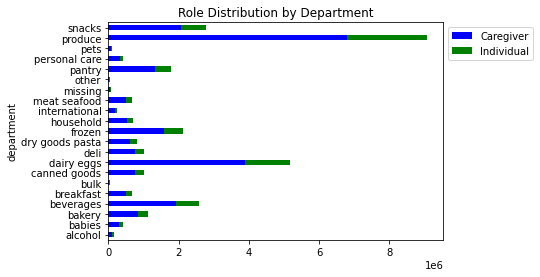

In [67]:
# Create a stacked bar chart

stacked_bar_role_department = crosstab_role_departments.plot.barh(stacked = True, title = 'Role Distribution by Department', color = {'Caregiver': 'blue', 'Individual': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [68]:
# Export stacked bar chart

stacked_bar_role_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_role_department'))

## Export df_merged

In [69]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 37 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

In [71]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))